# Hypothesis Testing with Insurance Data - Core

Kris Barbier

## Imports and Load Data

In [1]:
#Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

In [2]:
#Load in data
df = pd.read_csv('Data/insurance - insurance.csv')

df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


## Hypothesis Test 1: Do smokers have higher insurance charges than non-smokers?

### State Hypotheses: 

- Null Hypothesis: There is no difference in charges between smokers and non-smokers.

- Alternate Hypothesis: Charges are higher for smokers than non-smokers.

- Alpha = 0.05

### Select Test:

- I will be using a 2-sample T-test for this question, because I am comparing the average charges for two different groups: smokers and non-smokers.

### Test Assumptions:

- Assumptions of 2-sample independent t-test:
    - No significant outliers
    - Normality
    - Equal variance

In [3]:
#Check sizes of samples in smoker feature
df['smoker'].value_counts()

no     1064
yes     274
Name: smoker, dtype: int64

In [4]:
#Split the data into two groups
smoker_charges = df.loc[df['smoker'] == 'yes', "charges"]
non_smoker_charges = df.loc[df['smoker'] == 'no', "charges"]
#Getting means for smoking and charges
print(f"For Smokers (n={len(smoker_charges)}): Mean={np.mean(smoker_charges):.2f}")
print(f"For Non-Smokers (n={len(non_smoker_charges)}): Mean={np.mean(non_smoker_charges):.2f}")

For Smokers (n=274): Mean=32050.23
For Non-Smokers (n=1064): Mean=8434.27


In [6]:
#Check for outliers in smokers
zscores_smoker = stats.zscore(smoker_charges)
outliers_smoker = abs(zscores_smoker)>3
np.sum(outliers_smoker)

0

In [7]:
#Check for outliers in non-smokers
zscores_non_smoker = stats.zscore(non_smoker_charges)
outliers_non_smoker = abs(zscores_non_smoker)>3
np.sum(outliers_non_smoker)

24

In [8]:
#Remove outliers
non_smoker_charges = non_smoker_charges[(np.abs(stats.zscore(non_smoker_charges)) < 3)]

In [9]:
#Normal test: smokers
result_smoker = stats.normaltest(smoker_charges)
result_smoker

NormaltestResult(statistic=61.03941356533816, pvalue=5.564930630036463e-14)

In [10]:
#Normal test: non-smokers
result_non_smoker = stats.normaltest(non_smoker_charges)
result_non_smoker

NormaltestResult(statistic=163.80367047789198, pvalue=2.6945416315543976e-36)

- Both sets are not normally distributed, however, because the sample sizes are both >15, we can continue as normal.

In [12]:
#Test for equal variance
result = stats.levene(smoker_charges, non_smoker_charges)
result

LeveneResult(statistic=520.7468821724297, pvalue=2.4247238784347824e-97)

- We do not have equal variance, however, we can continue as normal using equal_var = False in the test.

### Execute Test:

In [13]:
#Independent t-test with equal_var set to False
result = stats.ttest_ind(smoker_charges, non_smoker_charges, equal_var = False)
result

Ttest_indResult(statistic=33.732305987092516, pvalue=2.575322662587431e-104)

### Interpretation:

- The p-value of our independent t-test is much less than the significance level of 0.05, therefore we do see that there is a significant difference in charges between smokers and non-smokers. We can reject the null hypothesis.

### Supporting Visual:

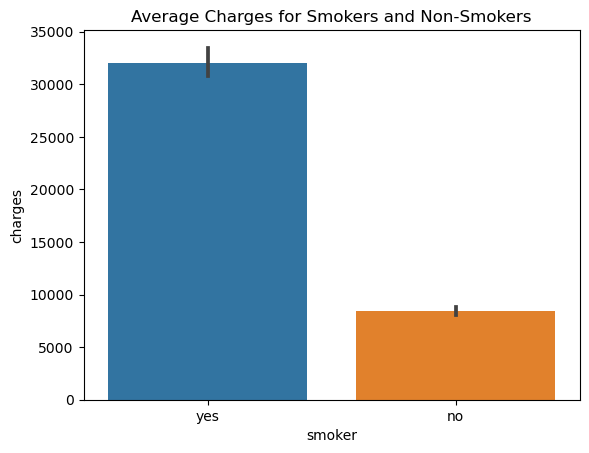

In [14]:
#Visual showing differences in average charges between groups
ax = sns.barplot(data= df, x= 'smoker', y='charges')
ax.set_title('Average Charges for Smokers and Non-Smokers');

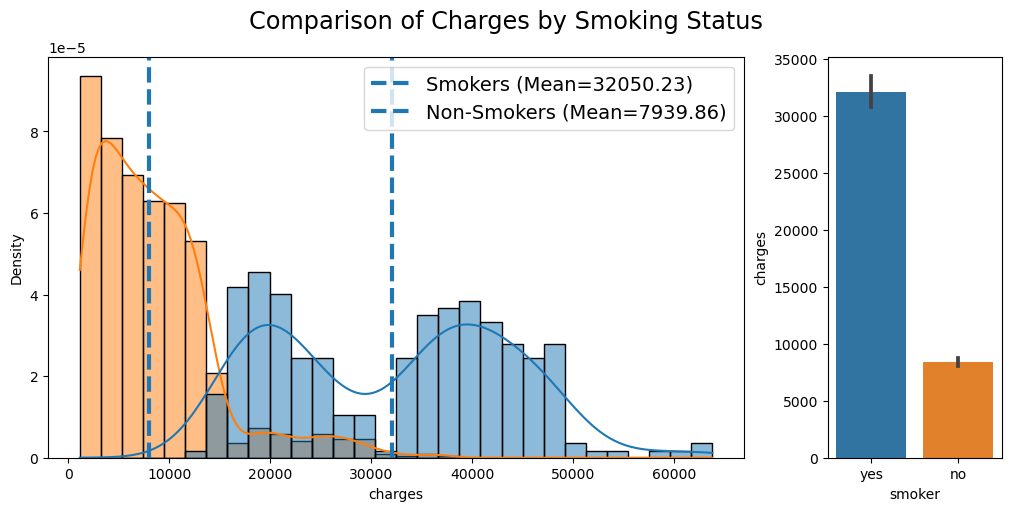

In [15]:
## Visualizing Sample means
fig, (ax,ax_bar) = plt.subplots(figsize= (10,5), ncols=2, 
                                constrained_layout=True,
                                gridspec_kw={'width_ratios':[0.8,0.2]})


# Histogram
ax = sns.histplot(data=df, x='charges',fill=True,hue='smoker',kde=True,
                  stat='density',common_norm=False,ax=ax)

ax.axvline(np.mean(smoker_charges), ls='--',lw=3, 
           label=f"Smokers (Mean={np.mean(smoker_charges):.2f})")

ax.axvline(np.mean(non_smoker_charges), ls='--', lw=3, 
           label=f"Non-Smokers (Mean={np.mean(non_smoker_charges):.2f})")

ax.legend(prop={"size":14}, loc='upper right')#bbox_to_anchor=[1,1])
## Barplot
sns.barplot(data=df, x='smoker',y='charges',ax = ax_bar,)
fig.suptitle('Comparison of Charges by Smoking Status',fontsize='xx-large');

## Hypothesis Test 2: Are men more likely to smoke than women?

### State Hypotheses: 

- Null Hypothesis: There is no difference between men and women's likelihood of smoking.

- Alternate Hypothesis: Men are more likely to smoke than women.

- Alpha = 0.05

### Select Test:

- Because we are comparing two categorical variables, I will use a Chi-Squared test to answer this question.

### Test Assumptions:

- Assumptions of Chi-Squared Test:
    - There are two categorical variables. (Gender and smoking status)
    - The outcomes are independent. (Smoking status is not dependent on gender)
    
- The assumptions for this test are true.

### Execute Test:

In [16]:
#Create contingency table with pd.crosstab()
table = pd.crosstab(df['sex'], df['smoker'])
table

smoker,no,yes
sex,,
female,547,115
male,517,159


In [17]:
#Execute test
result = stats.chi2_contingency(table)
chi2, p, deg_free, expected_vals = result 

### Interpretation:

- Because our p-value is less than .05, we reject the null hypothesis. We have evidence that there is a statistically significant difference between men and women smokers.

In [18]:
#Print p-value
print(p)
p<.05

0.006548143503580696


True

### Supporting Visual:

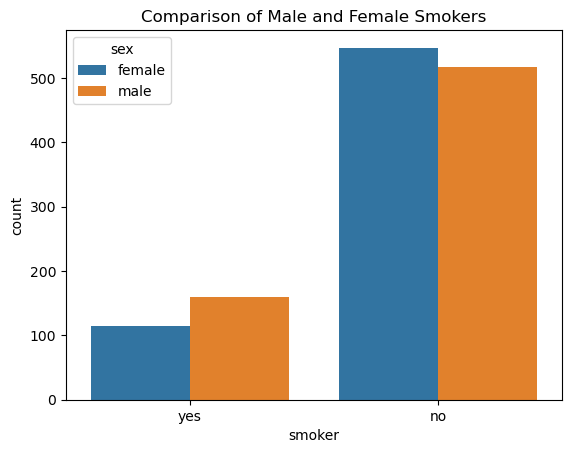

In [20]:
#Visualize counts of male and female smokers
ax = sns.countplot(data= df, x= 'smoker', hue= 'sex')
ax.set_title('Comparison of Male and Female Smokers');

## Hypothesis Test 3: Do different regions have different charges, on average?

### State Hypotheses:  

- Null Hypothesis: There are no differences in average charges by regions.

- Alternate Hypothesis: There are differences in average charges by region.

- Alpha = 0.05

### Select Test:

- Because we are comparing average charges for multiple groups, I will use a one-way ANOVA test to answer this question.

### Test Assumptions:

- Assumptions of one-way ANOVA test:
    - No significant outliers.
    - Normality.
    - Equal Variance.

In [21]:
##Create groups dictionary
groups = {}
#Loop through all unique categories
for i in df['region'].unique():
    ## Get series for group and rename
    data = df.loc[df['region']==i,'charges'].copy()
    
    # save into the dictionary
    groups[i] = data
groups.keys()

dict_keys(['southwest', 'southeast', 'northwest', 'northeast'])

In [22]:
## Running normal test on each group and confirming there are >20 in each group
norm_results = {}
for i, data in groups.items():
    stat, p = stats.normaltest(data)
    ## save the p val, test statistic, and the size of the group
    norm_results[i] = {'n': len(data),
                             'p':p,
                             'test stat':stat,}
## convert to a dataframe
norm_results_df = pd.DataFrame(norm_results).T
norm_results_df

,n,p,test stat
southwest,325.0,6.125298e-23,102.294059
southeast,364.0,4.953297e-15,65.877446
northwest,325.0,5.184209e-24,107.232850
northeast,324.0,1.455431e-19,86.747629


In [23]:
#Checking sig with pandas 
norm_results_df['sig'] = norm_results_df['p'] < .05 
norm_results_df


,n,p,test stat,sig
southwest,325.0,6.125298e-23,102.294059,True
southeast,364.0,4.953297e-15,65.877446,True
northwest,325.0,5.184209e-24,107.232850,True
northeast,324.0,1.455431e-19,86.747629,True


- Our groups are not normally distributed, however, each group has more than 15 samples, so we can continue as normal.

In [24]:
#Test for equal variance
stats.levene(*groups.values())

LeveneResult(statistic=5.559966758410606, pvalue=0.0008610590250786703)

- Because we fail the assumption of equal variance with this data, I will substitute a Kruskal-Wallis test instead.

### Execute Test:

In [25]:
#Execute test
result = stats.kruskal(*groups)
result

/Users/krisbarber/anaconda3/envs/dojo-env/lib/python3.9/site-packages/scipy/stats/_stats_py.py:112: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


KruskalResult(statistic=3.0, pvalue=0.3916251762710877)

### Interpretation:

- Our p-value from the Kruskal-Wallis test is greater than our alpha of 0.05, which means we fail to reject the null hypothesis. We do not have enough evidence to show that there are significant differences in charges in regions.

### Supporting Visual:

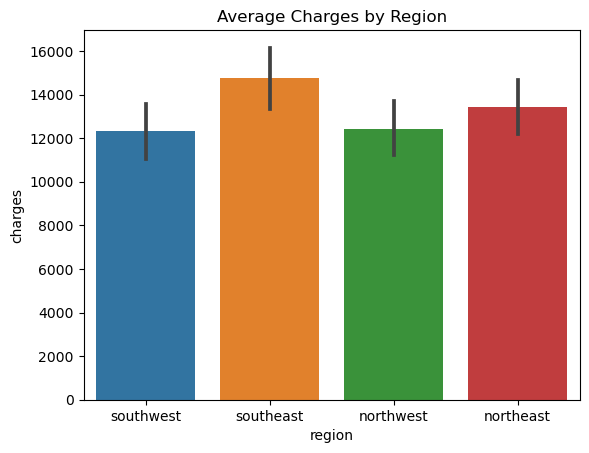

In [26]:
#Visualize average charges by region
ax = sns.barplot(data= df, x= 'region', y= 'charges')
ax.set_title('Average Charges by Region');